In [23]:
import json
import math

def calculate_entropy(probs):
    """Entropy calculation for a set of probabilities
    """
    h=0
    for p_i in probs:
        h+=p_i*math.log(p_i)
    return -h

def calculate_prob(voc_dict):
    """Caclulate the probabilities for given vocabulary with frequency
    """
    probs=[]
    tf=0
    #calculate total probability
    for key in voc_dict:
        tf+=voc_dict[key]
    #populate probability list for the given vocabulary
    for key in voc_dict:
        p_i=voc_dict[key]/tf
        probs.append(p_i)
    return probs
    

In [24]:
drug_voc="drug_bpe_from_umls_20_.json"
with open(drug_voc, "rb") as f:
    drug_voc= json.load(f)
print(len(drug_voc))

23407


In [35]:
probs=calculate_prob(drug_voc)
print(min(probs))

4.805203997487647e-08


In [28]:
H_X=calculate_entropy(probs)
print(H_X)

6.924002930988403


In [68]:
def calculate_sufficient_delta_set(probs):
    """Calculating sufficient delta set following David McKays book
    """
    p_delta=[]
    H=[]
    l=[]
    mn=min(probs) #Find the minimum probability
    probs.sort(reverse=True)
    for i in range(0,10): #Finding entropies for sets setting thresholds for minimum probability+ 0.1+e06
        mn=mn+0.000001
        delta_set = [p for p in probs if p > mn]
        print(len(delta_set))
        h=calculate_entropy(delta_set)
        p_delta.append(mn)
        H.append(h)
        l.append(len(delta_set))
    return p_delta, H, l

In [69]:
#print(probs)
lambda_values, entropies, l=calculate_sufficient_delta_set(probs)

15672
13040
11341
10070
9075
8343
7717
7214
6725
6302


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


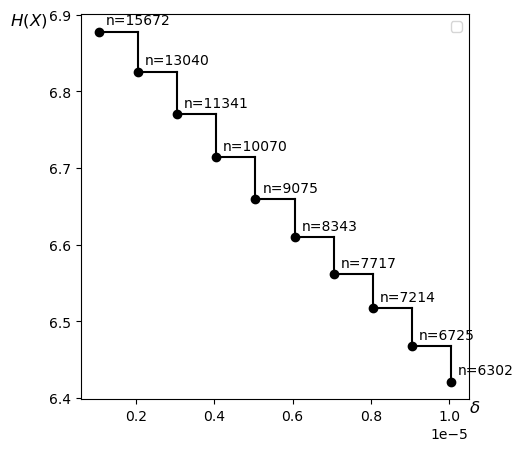

In [81]:
import matplotlib.pyplot as plt

# Example data (replace these with your lists)
#entropies = [0.1, 0.5, 0.3, 0.7, 0.9]
#lambda_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# Sorting the data based on lambda values
sorted_data = sorted(zip(lambda_values, entropies,l))

# Extracting sorted lambda and entropy values
lambda_values, entropies, num_elements = zip(*sorted_data)

# Plotting the L-shaped line segments
#plt.figure(figsize=(8, 6),facecolor='lightblue')
fig, ax = plt.subplots(figsize=(5, 5))
# Set the background color of the plot area (inside the figure)
#ax.set_facecolor('lightblue')
for i in range(len(entropies) - 1):
    plt.plot([lambda_values[i], lambda_values[i+1]], [entropies[i], entropies[i]], 'k-')
    plt.plot([lambda_values[i+1], lambda_values[i+1]], [entropies[i], entropies[i+1]], 'k-')

plt.scatter(lambda_values, entropies, color='black', zorder=5)
#plt.xlabel(r'$\delta$')
#plt.ylabel('H(X)')
#plt.title('H(X) vs $\delta$')
for i, txt in enumerate(num_elements):
    plt.annotate(f'n={txt}', (lambda_values[i], entropies[i]), textcoords="offset points", xytext=(5, 5), ha='left')
plt.legend()
plt.annotate('$\delta$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction', fontsize=12)
plt.annotate('$H(X)$', xy=(-.13, 1), xytext=(-15,2), ha='left', va='top', xycoords='axes fraction', textcoords='offset points', fontsize=12)
#plt.grid(True)
plt.show()

In [82]:
symptom_voc="symptom_bpe_from_umls_20_.json"
with open(symptom_voc, "rb") as f:
    symptom_voc= json.load(f)
print(len(symptom_voc))

12322


In [83]:
probs=calculate_prob(symptom_voc)
print(min(probs))

1.6301791811446955e-07


In [84]:
H_X=calculate_entropy(probs)
print(H_X)

6.699376871415856


In [85]:
lambda_values, entropies, l=calculate_sufficient_delta_set(probs)

10143
8964
8194
7593
7116
6690
6342
5978
5677
5427


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


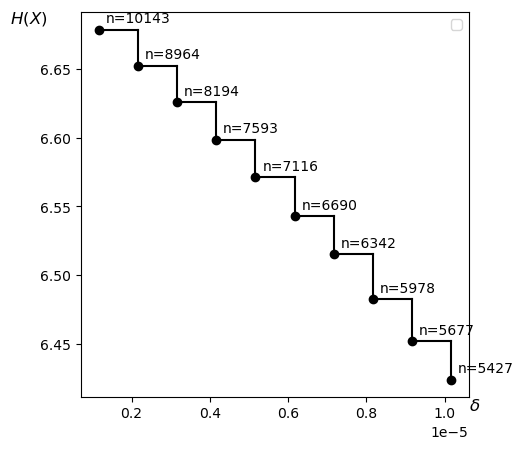

In [86]:
import matplotlib.pyplot as plt

# Example data (replace these with your lists)
#entropies = [0.1, 0.5, 0.3, 0.7, 0.9]
#lambda_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# Sorting the data based on lambda values
sorted_data = sorted(zip(lambda_values, entropies,l))

# Extracting sorted lambda and entropy values
lambda_values, entropies, num_elements = zip(*sorted_data)

# Plotting the L-shaped line segments
#plt.figure(figsize=(8, 6),facecolor='lightblue')
fig, ax = plt.subplots(figsize=(5, 5))
# Set the background color of the plot area (inside the figure)
#ax.set_facecolor('lightblue')
for i in range(len(entropies) - 1):
    plt.plot([lambda_values[i], lambda_values[i+1]], [entropies[i], entropies[i]], 'k-')
    plt.plot([lambda_values[i+1], lambda_values[i+1]], [entropies[i], entropies[i+1]], 'k-')

plt.scatter(lambda_values, entropies, color='black', zorder=5)
#plt.xlabel(r'$\delta$')
#plt.ylabel('H(X)')
#plt.title('H(X) vs $\delta$')
for i, txt in enumerate(num_elements):
    plt.annotate(f'n={txt}', (lambda_values[i], entropies[i]), textcoords="offset points", xytext=(5, 5), ha='left')
plt.legend()
plt.annotate('$\delta$', xy=(1, 0), ha='left', va='top', xycoords='axes fraction', fontsize=12)
plt.annotate('$H(X)$', xy=(-.13, 1), xytext=(-15,2), ha='left', va='top', xycoords='axes fraction', textcoords='offset points', fontsize=12)
#plt.grid(True)
plt.show()